In [14]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

from faces_model_test_open import FaceTest
from data import ResizeTransform, EmojiDataset, MSCeleb1MDataset

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

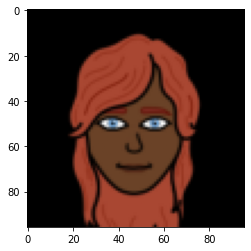

In [16]:
train_set = EmojiDataset('./datasets/emoji_data/', 0, 2000, transform=ResizeTransform(96))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)

data_iter = iter(train_loader)

img_tens = data_iter.next()
# plt.imshow(og_img)
plt.imshow(np.transpose(img_tens.numpy()[0], (1, 2, 0)))
plt.show()

In [18]:
train_set = EmojiDataset('./datasets/emoji_data/', 0, 3000, transform=ResizeTransform(96))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

data_iter = iter(train_loader)

sum = torch.zeros((3))
for i in range(0, 100):
    if i % 1000 == 0:
        print('data ' + str(i))
    print(i)
    img = data_iter.next()
    sum[0] += torch.sum(img[:,0,:,:])
    sum[1] += torch.sum(img[:,1,:,:])
    sum[2] += torch.sum(img[:,2,:,:])

sum /= 100*100*96*96
print(sum)

mean = sum
diff_sum = torch.zeros((3))
for i in range(0, 100):
    if i % 1000 == 0:
        print('data ' + str(i))
    img = data_iter.next()
    diff_sum[0] += torch.sum((img[:,0,:,:] - mean[0])*(img[:,0,:,:] - mean[0]))
    diff_sum[1] += torch.sum((img[:,1,:,:] - mean[1])*(img[:,1,:,:] - mean[1]))
    diff_sum[2] += torch.sum((img[:,2,:,:] - mean[2])*(img[:,2,:,:] - mean[2]))

diff_sum /= (100*100*96*96 - 1)
std = torch.sqrt(diff_sum)
print(std)
    
# img_tens = data_iter.next()
# # plt.imshow(og_img)
# plt.imshow(np.transpose(img_tens.numpy()[0], (1, 2, 0)))
# plt.show()

data 0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


StopIteration: 

In [ ]:
train_set = MSCeleb1MDataset('./datasets/ms-celeb-1m/data/', 'train', ResizeTransform(96))
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)

In [ ]:
data_iter = iter(train_loader)

img_tens = data_iter.next()
plt.imshow(np.transpose(img_tens.numpy()[0], (1, 2, 0)))
plt.show()

# Begin Model Testing

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from faces_model_test_open import FaceTest
from faces_model_test_sphere import FaceTestSphere
from data import ResizeTransform, EmojiDataset, MSCeleb1MDataset

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

In [ ]:
# test = FaceTest(use_gpu=True)
test = FaceTestSphere(use_gpu=True)

In [ ]:
test.create_data_loaders()

In [ ]:
test.visualize_single_batch()

In [ ]:
def get_num_parameters(model):
    total_num=0
    if type(model) == type(dict()):
        for key in model:
            for p in model[key].parameters():
                total_num+=p.nelement()
    else:
        for p in model.parameters():
            total_num+=p.nelement()
    return total_num

test.create_model()
print(test.model)
print('num params: ' + str(get_num_parameters(test.model)))

In [ ]:
test.create_loss_function()

In [ ]:
test.create_optimizer()

In [ ]:
kwargs = {}
kwargs["visualize_batches"] = 10
kwargs["save_batches"] = 50
test.train_model(num_epochs=3, **kwargs)

In [ ]:
checkpoint_name = './log/1513065292_0_1099.tar' 

In [ ]:
torch.save(test.log, checkpoint_name)

In [ ]:
log=torch.load(checkpoint_name)
G_model=log['G_model']
D_model=log['D_model']
test.log = log
test.model['G'] = G_model
test.model['D'] = D_model

In [ ]:
plt.figure()
matplotlib.rcParams['font.size'] = 14
for key in test.log:
    if 'loss' in key and test.log[key] is not None:
        y = test.log[key][2:]
        x = np.arange(0, 11450, 50)
        plt.plot(y,label=key)
        plt.legend()
#         plt.ylabel('Loss')
#         plt.xlabel('Batches (size 128)')
        plt.show()